In [1]:
# Installing the required packages.
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install nltk
!pip install wordcloud
!pip install xgboost

In [2]:
# Importing the required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [3]:
# Reading the dataset.
pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# Storing data into a df variable.
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [5]:
# Checking the shape of the data.
df.shape

(5572, 5)

In [6]:
# Displaying a sample of the data.
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
842,ham,Our Prashanthettan's mother passed away last n...,NaN,NaN,NaN
2628,ham,Haha... They cant what... At the most tmr forf...,NaN,NaN,NaN
3975,ham,I wish u were here. I feel so alone,NaN,NaN,NaN
2665,ham,R u meeting da ge at nite tmr?,NaN,NaN,NaN
3871,ham,I am joining today formally.Pls keep praying.w...,NaN,NaN,NaN


### Step 1 : Data Cleaning

In [7]:
# Checking dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### *In **`Unnamed: 2`**, **`Unnamed: 3'**, and **`Unnamed: 4`** features, there is incomplete data.*

In [8]:
# Checking the missing values.
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##### *There are missing values in the **`Unnamed: 2`**, **`Unnamed: 3'**, and **`Unnamed: 4`** features.*

In [9]:
# Calculating the percentage of missing values.
missing_percentage = ( df.isnull().sum() / df.shape[0] ) * 100
print(missing_percentage)

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64


##### *There are more than 99% missing values in the **`Unnamed: 2`**, **`Unnamed: 3`**, and **`Unnamed: 4`** features; therefore, these columns will be dropped.*

In [10]:
# Dropping the features that are not required.
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [11]:
# Data after dropping the irrelevent features.
df.sample(5)

,v1,v2
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
3121,spam,Free entry in 2 a weekly comp for a chance to ...
5337,ham,My birthday is on feb &lt;#&gt; da. .
2798,ham,I've told him that i've returned it. That shou...
4848,ham,either way works for me. I am &lt;#&gt; year...


In [12]:
# Renaming feature names for better readability.
df.rename(columns = {'v1':'Predictions','v2':'Messages'}, inplace = True)
df.sample(5)

,Predictions,Messages
3971,ham,WOT U UP 2 J?
1683,ham,Already am squatting is the new way of walking
4886,spam,Todays Vodafone numbers ending with 4882 are s...
2029,ham,Thanx but my birthday is over already.
923,ham,She went to attend another two rounds today..b...


In [13]:
# Rearranging the feature
desired_column_order = ["Messages","Predictions"]

In [14]:
df[desired_column_order]

,Messages,Predictions
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [15]:
# Storing the data in the df variable.
df = df[desired_column_order]

In [16]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions
3611,"K, my roommate also wants a dubsack and anothe...",ham
2938,Are you ok. What happen to behave like this,ham
1593,PRIVATE! Your 2003 Account Statement for shows...,spam
3313,Oh gei. That happend to me in tron. Maybe ill ...,ham
2446,"Sorry, I'll call later",ham


In [17]:
# Checking if there are duplicate values in the data.
df.duplicated().sum()

403

#### *Their are duplicate values in the data; we will drop them.*

In [18]:
# Dropping the duplicate value.
df.drop_duplicates(keep = 'first', inplace = True)

In [19]:
# I am checking again if there are duplicate values in the data.
df.duplicated().sum()

0

##### *Now there are no duplicate values.*

##### *Taking a backup of clean data.*

In [20]:
# Storing data into a csv file.
df.to_csv('clean.csv',index=None)

In [21]:
# Reading the cleaned data.
pd.read_csv("clean.csv")

,Messages,Predictions
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5164,This is the 2nd time we have tried 2 contact u...,spam
5165,Will Ì_ b going to esplanade fr home?,ham
5166,"Pity, * was in mood for that. So...any other s...",ham
5167,The guy did some bitching but I acted like i'd...,ham


In [22]:
# Storing a cleaned data file into a df variable.
df = pd.read_csv("clean.csv")

In [23]:
# Converting a target feature into a numerical feature.
# Method 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Predictions'] = encoder.fit_transform(df['Predictions'])

# Method 2
# df['Predictions'] = df['Predictions'].map({"ham":0,"spam":1})

In [24]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions
1347,Oh k.i think most of wi and nz players unsold.,0
4468,We're on the opposite side from where we dropp...,0
1936,Do whatever you want. You know what the rules ...,0
4915,Dear where you. Call me,0
5131,I think that tantrum's finished so yeah I'll b...,0


##### *0 represents a ham message, and 1 represents a spam message.*

### Step 2: EDA

In [25]:
# Checking the total number of values in the target feature.
df['Predictions'].value_counts()

Predictions
0    4516
1     653
Name: count, dtype: int64

In [26]:
# Storing the count of the target feature into the output_count variable.
output_count = df['Predictions'].value_counts()

In [27]:
output_count

Predictions
0    4516
1     653
Name: count, dtype: int64

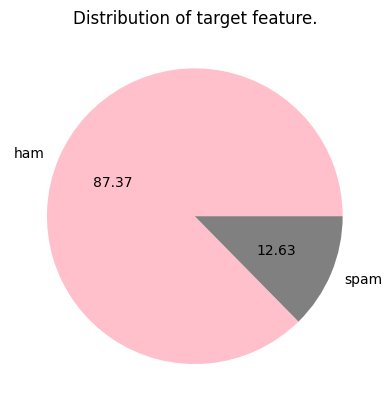

In [28]:
# Plotting the pie chart for the target feature.
plt.pie(output_count, labels = ['ham', 'spam'], autopct = "%0.2f", colors = ['#FFC0CB', '#808080'])
plt.title('Distribution of target feature.')
plt.show()

##### *Data is highly imbalanced.*

##### *Now I will check the number of sentences, number of words, and number of characters used in each message with respect to ham and spam.*

In [29]:
# !pip install nltk

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /config/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Calculating the number of sentences used in each message.
print("Number of sentences used in each message :")
df['Messages'].apply(lambda x : len(nltk.sent_tokenize(x)))

Number of sentences used in each message :


0       2
1       2
2       2
3       1
4       1
       ..
5164    4
5165    1
5166    2
5167    1
5168    2
Name: Messages, Length: 5169, dtype: int64

In [32]:
# Storing the count of sentences in the number_of_sentences variable.
df['number_of_sentences'] = df['Messages'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [33]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions,number_of_sentences
4042,Are you still playing with gautham?,0,1
1096,Do you want 750 anytime any network mins 150 t...,1,1
2900,Just woke up. Yeesh its late. But I didn't fal...,0,3
1146,"I'm outside islands, head towards hard rock an...",0,1
835,Stop the story. I've told him i've returned it...,0,2


In [34]:
# Calculating the number of words used in each message.
print("Number of words used in each message")
df['Messages'].apply(lambda x : len(nltk.word_tokenize(x)))

Number of words used in each message


0       24
1        8
2       37
3       13
4       15
        ..
5164    35
5165     9
5166    15
5167    27
5168     7
Name: Messages, Length: 5169, dtype: int64

In [35]:
# Storing the count of words in the number_of_words variable.
df['number_of_words'] = df['Messages'].apply(lambda x : len(nltk.word_tokenize(x)))

In [36]:
# Sample 5 records of the overall dataset.
df.sample(5)

,Messages,Predictions,number_of_sentences,number_of_words
70,Wah lucky man... Then can save money... Hee...,0,1,11
3845,how are you? I miss you!,0,2,8
1248,"Just wondering, the others just took off",0,1,8
3223,No she didnt. I will search online and let you...,0,2,13
4938,Jus finish watching tv... U?,0,1,7


In [37]:
# Calculating the number of characters used in each message.
print("Number of characters used in each message : ")
df['Messages'].apply(len)

Number of characters used in each message : 


0       111
1        29
2       155
3        49
4        61
       ... 
5164    161
5165     37
5166     57
5167    125
5168     26
Name: Messages, Length: 5169, dtype: int64

In [38]:
# Storing the count of characters in the number_of_character variable.
df['number_of_character'] = df['Messages'].apply(len)

In [39]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions,number_of_sentences,number_of_words,number_of_character
4959,My birthday is on feb &lt;#&gt; da. .,0,2,15,39
1786,I dont want to hear philosophy. Just say what ...,0,2,11,52
670,ÌÏ log off 4 wat. It's sdryb8i,0,2,9,30
5117,You are a great role model. You are giving so ...,0,4,61,245
1545,As a Registered Subscriber yr draw 4 a å£100 g...,1,3,31,146


In [40]:
# Calculating descriptive statistics for the columns: number_of_sentences, number_of_words, and number_of_characters.
print("Descriptive Statistics for overall messages :")
df[["number_of_sentences", "number_of_words", "number_of_character"]].describe()

Descriptive Statistics for overall messages :


,number_of_sentences,number_of_words,number_of_character
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


##### *The minimum number of sentences used for a message is 1, while the maximum number of sentences used is 38.*
##### *The minimum number of words used in a message is 1, while the maximum number of words used is 220.*
##### *The minimum number of characters used in a message is 2, while the maximum number of characters used is 910.*

In [41]:
# Calculating descriptive statistics for the columns number_of_sentences, number_of_words, and number_of_characters with respect to ham messages.
print("Descriptive statistics for ham messages:")
df[df['Predictions'] == 0][["number_of_sentences", "number_of_words", "number_of_character"]].describe()

Descriptive statistics for ham messages:


,number_of_sentences,number_of_words,number_of_character
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


##### *The minimum number of sentences used in a Ham message is 1, while the maximum number of sentences used in a Ham message is 38.*
##### *The minimum number of words used in a ham message is 1, while the maximum number of words used in a ham message is 220.*
##### *The minimum number of characters used in a Ham message is 2, while the maximum number of characters used in a Ham message is 910.*

In [42]:
# Calculating descriptive statistics for the columns number_of_sentences, number_of_words, and number_of_characters with respect to spam messages.
print("Descriptive statistics for Spam messages:")
df[df['Predictions'] == 1][["number_of_sentences", "number_of_words", "number_of_character"]].describe()

Descriptive statistics for Spam messages:


,number_of_sentences,number_of_words,number_of_character
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


##### *The minimum number of sentences used in a spam message is 1, while the maximum number of sentences used in a spam message is 9.*
##### *The minimum number of words used in a spam message is 2, while the maximum number of words used in a spam message is 46.*
##### *The minimum number of characters used in a spam message is 13, while the maximum number of characters used in a spam message is 224.

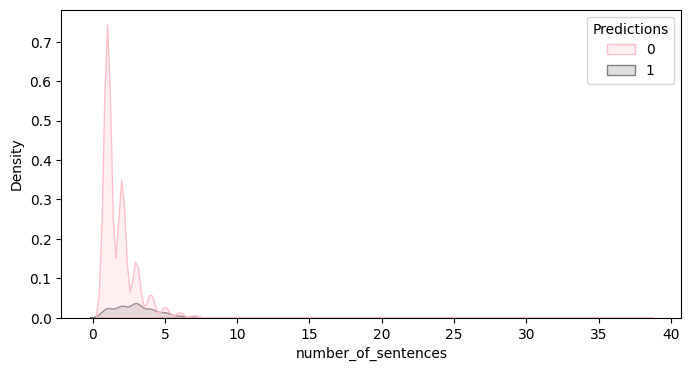

In [43]:
# Distribution of the number of sentences with predictions.
plt.figure(figsize=(8, 4))
sns.kdeplot(x = 'number_of_sentences', hue = 'Predictions', data = df, fill = True, palette = ['#FFC0CB', '#808080'])
plt.show()

##### - *Most of the ham message contains fewer sentences as compared to spam message.*

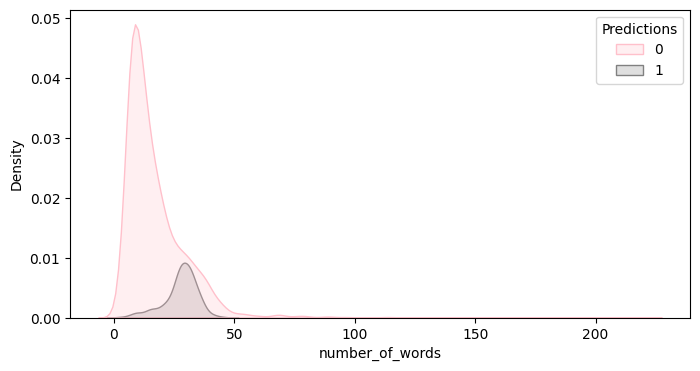

In [44]:
# Distribution of the number of words with predictions.
plt.figure(figsize=(8, 4))
sns.kdeplot(x = 'number_of_words', hue = 'Predictions', data = df, fill = True, palette = ['#FFC0CB', '#808080'])
plt.show()

##### - *Most of the ham message contains fewer words as compared to spam message.*

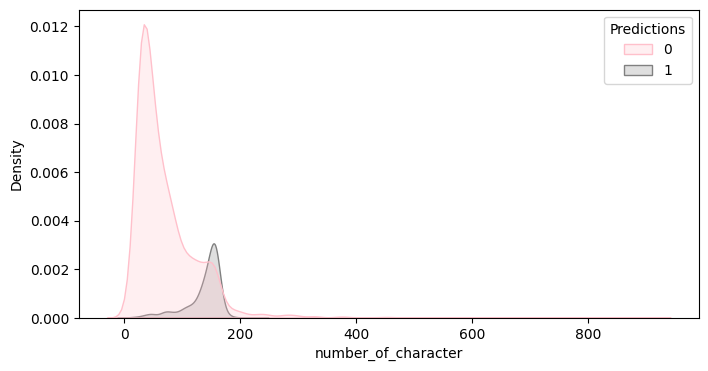

In [45]:
# Distribution of the number of character with predictions.
plt.figure(figsize=(8, 4))
sns.kdeplot(x = 'number_of_character', hue = 'Predictions', data = df, fill = True, palette = ['#FFC0CB', '#808080'])
plt.show()

##### - *Most of the ham message contains fewer characters as compared to spam message.*

<Axes: >

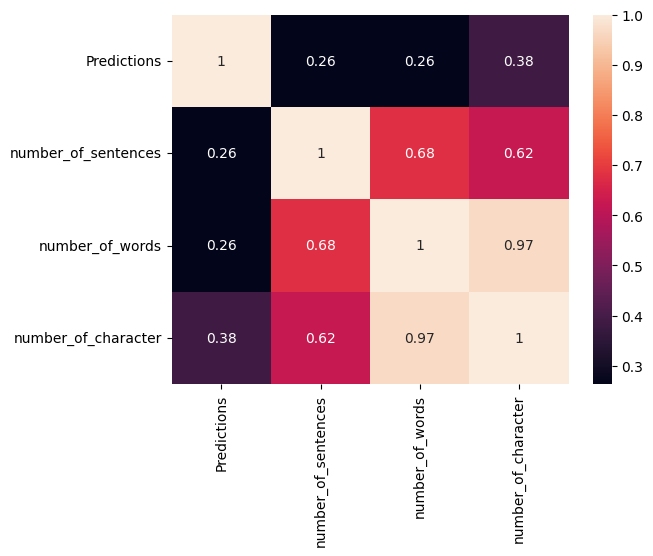

In [46]:
# Analyzing relationships between predictions, sentences, words, and characters.
sns.heatmap(df[['Predictions', 'number_of_sentences', 'number_of_words', 'number_of_character']].corr(), annot = True)

##### - *I see that the number of words is highly related to the number of characters.*

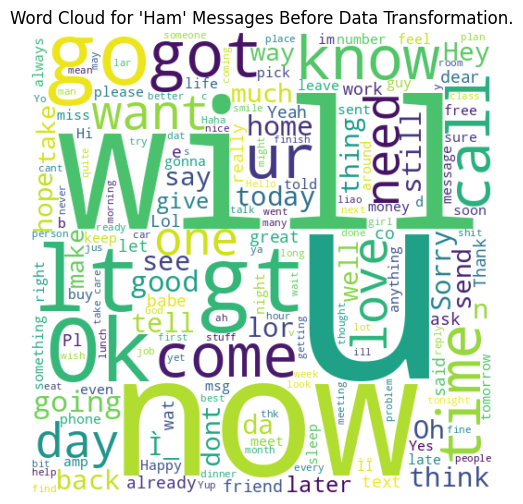

In [47]:
# Creating a Word cloud for ham messages before data transformation.
wordcloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wordcloud = wordcloud.generate(df[df['Predictions'] == 0]['Messages'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Ham' Messages Before Data Transformation.")
plt.axis("off")
plt.show()

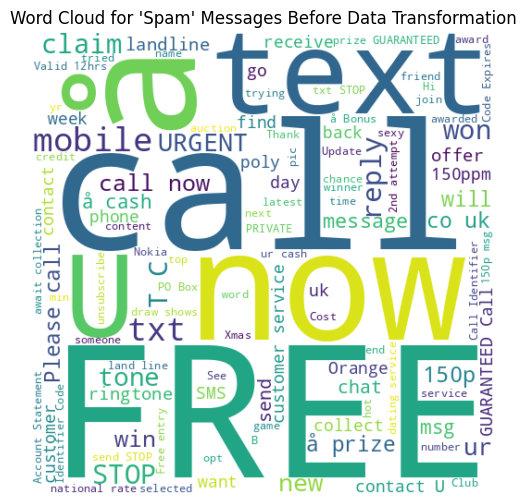

In [48]:
# Creating a Word cloud for spam messages before data transformation.
spam_wordcloud = wordcloud.generate(df[df['Predictions'] == 1]['Messages'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Spam' Messages Before Data Transformation")
plt.axis("off")
plt.show()

### Step 3: Data Preprocessing

- *Lower case*
- *Tokenization*
- *Removing special characters*
- *Removing stop words and punctuation*
- *Stemming*

In [49]:
# String Conversion: Uppercase to Lowercase Transformation Example.
demo_str = "WHO ARE YOU SEEING?"
demo_str.lower()

'who are you seeing?'

In [50]:
text = df['Messages'][43].lower()
text

'who are you seeing?'

In [51]:
# Tokenization
text = nltk.word_tokenize(text)
text

['who', 'are', 'you', 'seeing', '?']

In [52]:
# Removing special characters.
lst = []
for i in text:
    if i.isalnum():
        lst.append(i)
lst

['who', 'are', 'you', 'seeing']

In [53]:
# Downloading stopwords.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Stopwords Exclusion Check for list elements.
print(lst[0] not in stopwords.words('english'))
print(lst[3] not in stopwords.words('english'))

False
True


In [55]:
# Removing punctuation.
print(lst[0] not in string.punctuation)
print(lst[3] not in string.punctuation)

True
True


In [56]:
# Removing stop words and punctuation together.
lst[0] not in stopwords.words('english') and lst[0] not in string.punctuation

False

In [57]:
# Removing stop words and punctuation together.
lst[3] not in stopwords.words('english') and lst[3] not in string.punctuation

True

In [58]:
# Applying Stemming.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem(lst[3])

'see'

In [59]:
# Now we will make a function that will perform all the above steps in one go.

def data_transform(message):
    # Step 1: Convert to lowercase
    lower_message =  message.lower()
    
    # Step 2: Tokenize the message
    list_of_words = nltk.word_tokenize(lower_message)

    # Step 3: Remove non-alphanumeric characters
    updated_list_of_word = []

    for i in list_of_words:
        if i.isalnum():
            updated_list_of_word.append(i)

    # Step 4: Remove stopwords and punctuation
    list_without_stopwords = []
    for i in updated_list_of_word:
        if i not in stopwords.words('english') and i not in string.punctuation:
            list_without_stopwords.append(i)

    # Step 5: Stemming
    final_list = []
    for i in list_without_stopwords:
        stem_word = ps.stem(i)
        final_list.append(stem_word)
    
    # Join the final list into a string and return
    return " ".join(final_list)

In [60]:
# Applying data preprocessing to the first message (input) feature.
df['Messages'][:1].apply(data_transform)

0    go jurong point crazi avail bugi n great world...
Name: Messages, dtype: object

In [61]:
# Applying data preprocessing to the entire message and storing it in the transform_data variable.
df["transform_data"] = df['Messages'].apply(data_transform)

In [62]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [63]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions,number_of_sentences,number_of_words,number_of_character,transform_data
1117,Babe ? I lost you ... :-(,0,2,9,25,babe lost
3367,Sent me de webadres for geting salary slip,0,1,8,42,sent de webadr gete salari slip
3909,Well if I'm that desperate I'll just call arma...,0,1,12,54,well desper call armand
4618,Doing my masters. When will you buy a bb cos i...,0,2,19,73,master buy bb co sale bf
262,"Not sure yet, still trying to get a hold of him",0,1,12,47,sure yet still tri get hold


In [64]:
# Displaying the original message and transforming the text message.
df[['Messages','transform_data']].sample(5)

,Messages,transform_data
3100,Lol your right. What diet? Everyday I cheat an...,lol right diet everyday cheat anyway meant fatti
4806,K k:) sms chat with me.,k k sm chat
179,Lol no. U can trust me.,lol u trust
4322,Jus finish blowing my hair. U finish dinner al...,ju finish blow hair u finish dinner alreadi
3071,"Its ok, if anybody asks abt me, u tel them..:-P",ok anybodi ask abt u tel


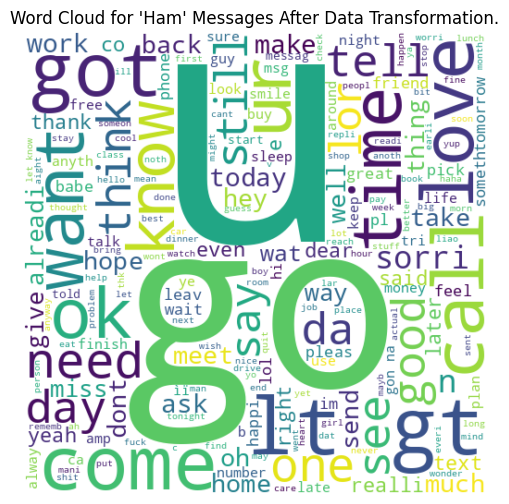

In [65]:
# Creating a Word cloud for ham messages after data transformation.
ham_wordcloud = wordcloud.generate(df[df['Predictions'] == 0]['transform_data'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Ham' Messages After Data Transformation.")
plt.axis("off")
plt.show()

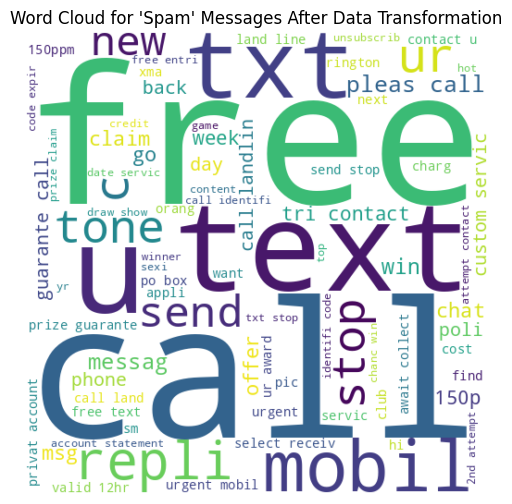

In [66]:
# Creating a Word cloud for spam messages after data transformation.
spam_wordcloud = wordcloud.generate(df[df['Predictions'] == 1]['transform_data'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for 'Spam' Messages After Data Transformation")
plt.axis("off")
plt.show()

##### *Now we will check which words are frequently used in spam and ham messages.*

In [67]:
# Extracting the spam words from the first message.
df[df['Predictions']==1]['transform_data'].tolist()[0].split()

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18']

In [68]:
# Creating a list that contains all the spam words.
spam_words = []
for i in df[df['Predictions'] == 1]['transform_data'].tolist():
    for word in i.split():
        spam_words.append(word)

In [69]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [70]:
len(spam_words)

9939

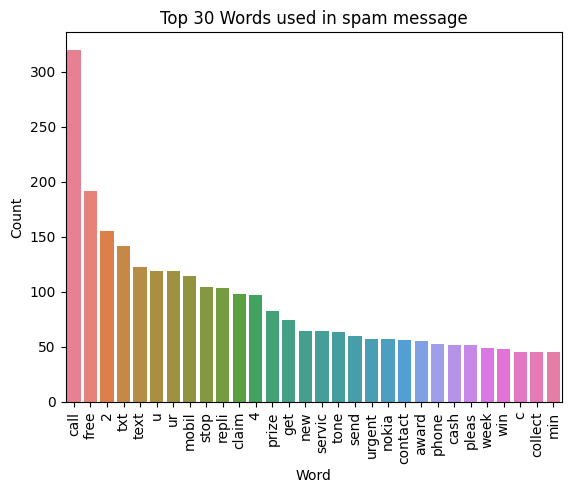

In [71]:
# Now we will find the top 30 most frequent spam words.
word_counts = Counter(spam_words)
top_words = word_counts.most_common(30)

df_top_words = pd.DataFrame(top_words, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', hue = 'Word', y = 'Count', data = df_top_words, legend = False)
plt.xticks(rotation = 'vertical')
plt.title("Top 30 Words used in spam message")
plt.show()

In [72]:
# Creating a list that contains all the ham words.
ham_words = []
for i in df[df['Predictions'] == 0]['transform_data'].tolist():
    for word in i.split():
        ham_words.append(word)

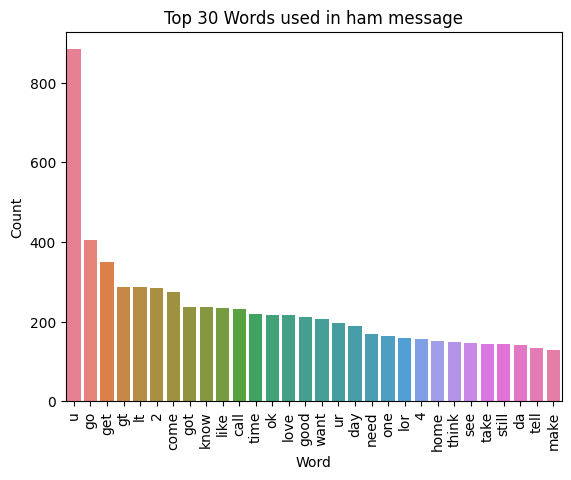

In [73]:
# Now we will find the top 30 most frequent spam words.
word_counts = Counter(ham_words)
top_words = word_counts.most_common(30)

df_top_words = pd.DataFrame(top_words, columns = ['Word', 'Count'])

sns.barplot(x = 'Word',hue = 'Word', y = 'Count', data = df_top_words, legend = False)
plt.title("Top 30 Words used in ham message")
plt.xticks(rotation='vertical')
plt.show()

### Step 4: Converting Text feature into numberical feature

In [74]:
# Displaying a sample of the data.
df.sample(5)

,Messages,Predictions,number_of_sentences,number_of_words,number_of_character,transform_data
1492,Do u konw waht is rael FRIENDSHIP Im gving yuo...,0,1,48,212,u konw waht rael friendship im gving yuo exmpe...
3359,Lol I know! Hey someone did a great inpersonat...,0,3,20,83,lol know hey someon great inperson flea forum ...
373,I guess that's why you re worried. You must kn...,0,6,70,300,guess worri must know way bodi repair quit sur...
1932,Hi here. have birth at on the to at 8lb 7oz....,0,3,19,81,hi birth 8lb 7oz mother babi brilliantli
4916,Xy trying smth now. U eat already? We havent...,0,3,12,47,xy tri smth u eat alreadi havent


In [75]:
# Using a Bag of Words to convert a text feature into a numerical feature
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [76]:
X = cv.fit_transform(df['transform_data']).toarray() # Independent feature
y = df['Predictions'].values # Dependent feature

In [77]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
# Splitting our data into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [80]:
# Importing Naive Bayes classifiers from scikit-learn.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [81]:
# Importing metrics for model evaluation.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [82]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Applying GaussianNB : ")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score",precision_score(y_test,y_pred_gnb))

Applying GaussianNB : 
--------------------------
Accuracy Score : 0.8800773694390716
Confusion Matrix :
 [[792 104]
 [ 20 118]]
Precision Score 0.5315315315315315


In [83]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Applying MultinomialNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score",precision_score(y_test,y_pred_mnb))

Applying MultinomialNB
--------------------------
Accuracy Score : 0.9642166344294004
Confusion Matrix :
 [[871  25]
 [ 12 126]]
Precision Score 0.8344370860927153


In [84]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Applying BernoulliNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score",precision_score(y_test,y_pred_bnb))

Applying BernoulliNB
--------------------------
Accuracy Score : 0.9700193423597679
Confusion Matrix :
 [[893   3]
 [ 28 110]]
Precision Score 0.9734513274336283


In [85]:
# Using Tf-idf to convert text feature into numberical feature using default setting
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [86]:
X = tfidf.fit_transform(df['transform_data']).toarray() # Independent feature
y = df['Predictions'].values # Dependent feature

In [87]:
# Splitting our data into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [88]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Applying GaussianNB : ")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score",precision_score(y_test,y_pred_gnb))

Applying GaussianNB : 
--------------------------
Accuracy Score : 0.8762088974854932
Confusion Matrix :
 [[793 103]
 [ 25 113]]
Precision Score 0.5231481481481481


In [89]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Applying MultinomialNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score",precision_score(y_test,y_pred_mnb))

Applying MultinomialNB
--------------------------
Accuracy Score : 0.9593810444874274
Confusion Matrix :
 [[896   0]
 [ 42  96]]
Precision Score 1.0


In [90]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Applying BernoulliNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score",precision_score(y_test,y_pred_bnb))

Applying BernoulliNB
--------------------------
Accuracy Score : 0.9700193423597679
Confusion Matrix :
 [[893   3]
 [ 28 110]]
Precision Score 0.9734513274336283


In [91]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [92]:
all_models = {
    'XGBClassifier' : xgb,
    'GradientBoostingClassifier' : gbc,
    'ExtraTreesClassifier' : etc,
    'BaggingClassifier' : bc, 
    'AdaBoostClassifier' : abc, 
    'RandomForestClassifier' : rfc, 
    'KNeighborsClassifier' : knc, 
    'DecisionTreeClassifier' : dtc, 
    'MultinomialNB' : mnb, 
    'SVC' : svc,
    'LogisticRegression' : lrc 
}

In [93]:
def model_training(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [94]:
model_training(xgb,X_train,X_test,y_train,y_test)

(0.9729206963249516, 0.9435483870967742)

In [95]:
accuracy_scores = []
precision_scores = []

for model_name, model_object in all_models.items():
    accuracy, precision = model_training(model_object,X_train,X_test,y_train,y_test) 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

In [96]:
accuracy_scores

[0.9729206963249516,
 0.9526112185686654,
 0.9729206963249516,
 0.9584139264990329,
 0.9613152804642167,
 0.971953578336557,
 0.9003868471953579,
 0.9361702127659575,
 0.9593810444874274,
 0.9729206963249516,
 0.9516441005802708]

In [97]:
precision_scores

[0.9435483870967742,
 0.9238095238095239,
 0.9824561403508771,
 0.8625954198473282,
 0.9454545454545454,
 1.0,
 1.0,
 0.8461538461538461,
 1.0,
 0.9741379310344828,
 0.94]

In [98]:
pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
5,RandomForestClassifier,0.971954,1.000000
6,KNeighborsClassifier,0.900387,1.000000
8,MultinomialNB,0.959381,1.000000
2,ExtraTreesClassifier,0.972921,0.982456
9,SVC,0.972921,0.974138
4,AdaBoostClassifier,0.961315,0.945455
0,XGBClassifier,0.972921,0.943548
10,LogisticRegression,0.951644,0.940000
1,GradientBoostingClassifier,0.952611,0.923810
3,BaggingClassifier,0.958414,0.862595


In [99]:
score_df =pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
score_df

,Algorithm,Accuracy,Precision
5,RandomForestClassifier,0.971954,1.000000
6,KNeighborsClassifier,0.900387,1.000000
8,MultinomialNB,0.959381,1.000000
2,ExtraTreesClassifier,0.972921,0.982456
9,SVC,0.972921,0.974138
4,AdaBoostClassifier,0.961315,0.945455
0,XGBClassifier,0.972921,0.943548
10,LogisticRegression,0.951644,0.940000
1,GradientBoostingClassifier,0.952611,0.923810
3,BaggingClassifier,0.958414,0.862595


In [101]:
# Using Tf-idf to convert text feature into numberical feature using max feature as 1000
tfidf = TfidfVectorizer(max_features=1000)

In [102]:
X = tfidf.fit_transform(df['transform_data']).toarray() # Independent feature
y = df['Predictions'].values # Dependent feature

In [103]:
# Splitting our data into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [104]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Applying GaussianNB : ")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score",precision_score(y_test,y_pred_gnb))

Applying GaussianNB : 
--------------------------
Accuracy Score : 0.7804642166344294
Confusion Matrix :
 [[687 209]
 [ 18 120]]
Precision Score 0.364741641337386


In [105]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Applying MultinomialNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score",precision_score(y_test,y_pred_mnb))

Applying MultinomialNB
--------------------------
Accuracy Score : 0.9777562862669246
Confusion Matrix :
 [[895   1]
 [ 22 116]]
Precision Score 0.9914529914529915


In [106]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Applying BernoulliNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score",precision_score(y_test,y_pred_bnb))

Applying BernoulliNB
--------------------------
Accuracy Score : 0.9835589941972921
Confusion Matrix :
 [[893   3]
 [ 14 124]]
Precision Score 0.9763779527559056


In [107]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [108]:
all_models = {
    'XGBClassifier' : xgb,
    'GradientBoostingClassifier' : gbc,
    'ExtraTreesClassifier' : etc,
    'BaggingClassifier' : bc, 
    'AdaBoostClassifier' : abc, 
    'RandomForestClassifier' : rfc, 
    'KNeighborsClassifier' : knc, 
    'DecisionTreeClassifier' : dtc, 
    'MultinomialNB' : mnb, 
    'SVC' : svc,
    'LogisticRegression' : lrc 
}

In [109]:
def model_training(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [110]:
model_training(xgb,X_train,X_test,y_train,y_test)

(0.9738878143133463, 0.9663865546218487)

In [111]:
accuracy_scores = []
precision_scores = []

for model_name, model_object in all_models.items():
    accuracy, precision = model_training(model_object,X_train,X_test,y_train,y_test) 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

In [112]:
accuracy_scores

[0.9738878143133463,
 0.9535783365570599,
 0.97678916827853,
 0.965183752417795,
 0.9632495164410058,
 0.9738878143133463,
 0.9168278529980658,
 0.9381044487427466,
 0.9777562862669246,
 0.9690522243713733,
 0.9613152804642167]

In [113]:
precision_scores

[0.9663865546218487,
 0.9411764705882353,
 0.9523809523809523,
 0.9047619047619048,
 0.9385964912280702,
 0.944,
 1.0,
 0.8627450980392157,
 0.9914529914529915,
 0.9568965517241379,
 0.9622641509433962]

In [114]:
pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_1000':accuracy_scores,'Precision_max_feature_1000':precision_scores}).sort_values('Precision_max_feature_1000',ascending=False)

,Algorithm,Accuracy_max_feature_1000,Precision_max_feature_1000
6,KNeighborsClassifier,0.916828,1.000000
8,MultinomialNB,0.977756,0.991453
0,XGBClassifier,0.973888,0.966387
10,LogisticRegression,0.961315,0.962264
9,SVC,0.969052,0.956897
2,ExtraTreesClassifier,0.976789,0.952381
5,RandomForestClassifier,0.973888,0.944000
1,GradientBoostingClassifier,0.953578,0.941176
4,AdaBoostClassifier,0.963250,0.938596
3,BaggingClassifier,0.965184,0.904762


In [115]:
max_feature_1000 = pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_1000':accuracy_scores,'Precision_max_feature_1000':precision_scores}).sort_values('Precision_max_feature_1000',ascending=False)

In [116]:
score_df = score_df.merge(max_feature_1000,on='Algorithm')

In [117]:
score_df

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381
4,SVC,0.972921,0.974138,0.969052,0.956897
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762


In [118]:
# Using Tf-idf to convert text feature into numberical feature using max feature as 3000
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
X = tfidf.fit_transform(df['transform_data']).toarray() # Independent feature
y = df['Predictions'].values # Dependent feature

In [120]:
# Splitting our data into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [121]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Applying GaussianNB : ")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score",precision_score(y_test,y_pred_gnb))

Applying GaussianNB : 
--------------------------
Accuracy Score : 0.8694390715667312
Confusion Matrix :
 [[788 108]
 [ 27 111]]
Precision Score 0.5068493150684932


In [122]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Applying MultinomialNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score",precision_score(y_test,y_pred_mnb))

Applying MultinomialNB
--------------------------
Accuracy Score : 0.9709864603481625
Confusion Matrix :
 [[896   0]
 [ 30 108]]
Precision Score 1.0


In [123]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Applying BernoulliNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score",precision_score(y_test,y_pred_bnb))

Applying BernoulliNB
--------------------------
Accuracy Score : 0.9835589941972921
Confusion Matrix :
 [[895   1]
 [ 16 122]]
Precision Score 0.991869918699187


In [124]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [125]:
all_models = {
    'XGBClassifier' : xgb,
    'GradientBoostingClassifier' : gbc,
    'ExtraTreesClassifier' : etc,
    'BaggingClassifier' : bc, 
    'AdaBoostClassifier' : abc, 
    'RandomForestClassifier' : rfc, 
    'KNeighborsClassifier' : knc, 
    'DecisionTreeClassifier' : dtc, 
    'MultinomialNB' : mnb, 
    'SVC' : svc,
    'LogisticRegression' : lrc 
}

In [126]:
def model_training(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [127]:
model_training(xgb,X_train,X_test,y_train,y_test)

(0.9671179883945842, 0.9262295081967213)

In [128]:
accuracy_scores = []
precision_scores = []

for model_name, model_object in all_models.items():
    accuracy, precision = model_training(model_object,X_train,X_test,y_train,y_test) 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

In [129]:
accuracy_scores

[0.9671179883945842,
 0.9468085106382979,
 0.9748549323017408,
 0.9584139264990329,
 0.960348162475822,
 0.9758220502901354,
 0.9052224371373307,
 0.9274661508704062,
 0.9709864603481625,
 0.9758220502901354,
 0.9584139264990329]

In [130]:
precision_scores

[0.9262295081967213,
 0.9191919191919192,
 0.9745762711864406,
 0.8682170542635659,
 0.9292035398230089,
 0.9829059829059829,
 1.0,
 0.8118811881188119,
 1.0,
 0.9747899159663865,
 0.9702970297029703]

In [131]:
pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_3000':accuracy_scores,'Precision_max_feature_3000':precision_scores}).sort_values('Precision_max_feature_3000',ascending=False)

,Algorithm,Accuracy_max_feature_3000,Precision_max_feature_3000
6,KNeighborsClassifier,0.905222,1.000000
8,MultinomialNB,0.970986,1.000000
5,RandomForestClassifier,0.975822,0.982906
9,SVC,0.975822,0.974790
2,ExtraTreesClassifier,0.974855,0.974576
10,LogisticRegression,0.958414,0.970297
4,AdaBoostClassifier,0.960348,0.929204
0,XGBClassifier,0.967118,0.926230
1,GradientBoostingClassifier,0.946809,0.919192
3,BaggingClassifier,0.958414,0.868217


In [132]:
max_feature_3000 = pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_3000':accuracy_scores,'Precision_max_feature_3000':precision_scores}).sort_values('Precision_max_feature_3000',ascending=False)

In [133]:
score_df = score_df.merge(max_feature_3000,on='Algorithm')

In [134]:
score_df

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000,Accuracy_max_feature_3000,Precision_max_feature_3000
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387,0.967118,0.926230
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217


In [135]:
score_df.to_csv("Accuracy_score.csv",index=None)

In [136]:
pd.read_csv("Accuracy_score.csv")

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000,Accuracy_max_feature_3000,Precision_max_feature_3000
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387,0.967118,0.926230
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217


- *Now We will applay feature scaling to check wheather their is change in accuracy and precision.*

In [137]:
# Using Tf-idf to convert text feature into numberical feature using max feature as 3000
tfidf = TfidfVectorizer(max_features=3000)

In [138]:
X = tfidf.fit_transform(df['transform_data']).toarray() # Independent feature
y = df['Predictions'].values # Dependent feature

In [139]:
# Splitting our data into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
# Importing Naive Bayes classifiers from scikit-learn.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [142]:
# Importing metrics for model evaluation.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [143]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
print("Applying GaussianNB : ")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score",precision_score(y_test,y_pred_gnb))

Applying GaussianNB : 
--------------------------
Accuracy Score : 0.8704061895551257
Confusion Matrix :
 [[778 118]
 [ 16 122]]
Precision Score 0.5083333333333333


In [144]:
mnb = MultinomialNB()
mnb.fit(X_train_scaled,y_train)
y_pred_mnb = mnb.predict(X_test_scaled)
print("Applying MultinomialNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score",precision_score(y_test,y_pred_mnb))

Applying MultinomialNB
--------------------------
Accuracy Score : 0.9748549323017408
Confusion Matrix :
 [[884  12]
 [ 14 124]]
Precision Score 0.9117647058823529


In [145]:
bnb = BernoulliNB()
bnb.fit(X_train_scaled,y_train)
y_pred_bnb = bnb.predict(X_test_scaled)
print("Applying BernoulliNB")
print('--------------------------')
print("Accuracy Score :",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score",precision_score(y_test,y_pred_bnb))

Applying BernoulliNB
--------------------------
Accuracy Score : 0.9835589941972921
Confusion Matrix :
 [[895   1]
 [ 16 122]]
Precision Score 0.991869918699187


In [146]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [147]:
all_models = {
    'XGBClassifier' : xgb,
    'GradientBoostingClassifier' : gbc,
    'ExtraTreesClassifier' : etc,
    'BaggingClassifier' : bc, 
    'AdaBoostClassifier' : abc, 
    'RandomForestClassifier' : rfc, 
    'KNeighborsClassifier' : knc, 
    'DecisionTreeClassifier' : dtc, 
    'MultinomialNB' : mnb, 
    'SVC' : svc,
    'LogisticRegression' : lrc 
}

In [148]:
def model_training(model,X_train_scaled,X_test_scaled,y_train,y_test):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [149]:
model_training(xgb,X_train_scaled,X_test_scaled,y_train,y_test)

(0.9671179883945842, 0.9262295081967213)

In [150]:
accuracy_scores = []
precision_scores = []

for model_name, model_object in all_models.items():
    accuracy, precision = model_training(model_object,X_train_scaled,X_test_scaled,y_train,y_test) 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

In [151]:
accuracy_scores

[0.9671179883945842,
 0.9468085106382979,
 0.9748549323017408,
 0.9584139264990329,
 0.960348162475822,
 0.9758220502901354,
 0.9090909090909091,
 0.9313346228239845,
 0.9748549323017408,
 0.9661508704061895,
 0.9642166344294004]

In [152]:
precision_scores

[0.9262295081967213,
 0.9191919191919192,
 0.9745762711864406,
 0.8682170542635659,
 0.9292035398230089,
 0.9829059829059829,
 0.9782608695652174,
 0.8252427184466019,
 0.9117647058823529,
 0.912,
 0.9391304347826087]

In [153]:
pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_3000_fs':accuracy_scores,'Precision_max_feature_3000_fs':precision_scores}).sort_values('Precision_max_feature_3000_fs',ascending=False)

,Algorithm,Accuracy_max_feature_3000_fs,Precision_max_feature_3000_fs
5,RandomForestClassifier,0.975822,0.982906
6,KNeighborsClassifier,0.909091,0.978261
2,ExtraTreesClassifier,0.974855,0.974576
10,LogisticRegression,0.964217,0.939130
4,AdaBoostClassifier,0.960348,0.929204
0,XGBClassifier,0.967118,0.926230
1,GradientBoostingClassifier,0.946809,0.919192
9,SVC,0.966151,0.912000
8,MultinomialNB,0.974855,0.911765
3,BaggingClassifier,0.958414,0.868217


In [154]:
max_feature_3000_fs = pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy_max_feature_3000_fs':accuracy_scores,'Precision_max_feature_3000_fs':precision_scores}).sort_values('Precision_max_feature_3000_fs',ascending=False)

In [155]:
score_df = score_df.merge(max_feature_3000_fs,on='Algorithm')

In [156]:
score_df

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000,Accuracy_max_feature_3000,Precision_max_feature_3000,Accuracy_max_feature_3000_fs,Precision_max_feature_3000_fs
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906,0.975822,0.982906
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000,0.909091,0.978261
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000,0.974855,0.911765
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790,0.966151,0.912000
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596,0.960348,0.929204,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387,0.967118,0.926230,0.967118,0.926230
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297,0.964217,0.939130
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192,0.946809,0.919192
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217,0.958414,0.868217


In [157]:
score_df.sort_values('Precision_max_feature_3000_fs',ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000,Accuracy_max_feature_3000,Precision_max_feature_3000,Accuracy_max_feature_3000_fs,Precision_max_feature_3000_fs
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906,0.975822,0.982906
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000,0.909091,0.978261
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576,0.974855,0.974576
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297,0.964217,0.939130
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596,0.960348,0.929204,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387,0.967118,0.926230,0.967118,0.926230
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192,0.946809,0.919192
4,SVC,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790,0.966151,0.912000
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000,0.974855,0.911765
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217,0.958414,0.868217


- *After doing feature scaling, there is an improvement in accuracy in multinomial NB, but the precision decreases, so we will not move with feature scaling.*

In [158]:
score_df.to_csv("Accuracy_score_fS.csv",index=None)

In [159]:
pd.read_csv("Accuracy_score_fS.csv").sort_values('Precision_max_feature_3000',ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_max_feature_1000,Precision_max_feature_1000,Accuracy_max_feature_3000,Precision_max_feature_3000,Accuracy_max_feature_3000_fs,Precision_max_feature_3000_fs
1,KNeighborsClassifier,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000,0.909091,0.978261
2,MultinomialNB,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000,0.974855,0.911765
0,RandomForestClassifier,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906,0.975822,0.982906
4,SVC,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790,0.966151,0.912000
3,ExtraTreesClassifier,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576,0.974855,0.974576
7,LogisticRegression,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297,0.964217,0.939130
5,AdaBoostClassifier,0.961315,0.945455,0.963250,0.938596,0.960348,0.929204,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.973888,0.966387,0.967118,0.926230,0.967118,0.926230
8,GradientBoostingClassifier,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192,0.946809,0.919192
9,BaggingClassifier,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217,0.958414,0.868217


- *So we have two algorithms to go with: KNeighborsClassifier and MultinomialNB, so I am going with MultinomialNB because it has a good accuracy and precision score with max features as 3000.*

- *Now we will apply a voting classifier to check whether there is an improvement in accuracy and precision in the top-performing model using X_train and y_train.*

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [161]:
from sklearn.ensemble import VotingClassifier

In [162]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [163]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [164]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [165]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [166]:
from sklearn.ensemble import StackingClassifier

In [167]:
sc = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [168]:
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


- *Their is no improvement so we will go with MultinomialNB with max feature as 3000.*

In [169]:
# import pickle
# pickle.dump(tfidf,open('word_to_vector.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))